In [1]:
from google.colab import files
uploaded = files.upload()   # choose restaurant_orders.csv from your machine


Saving restaurant_orders.csv to restaurant_orders.csv


In [2]:
!pip install -q scikit-learn xgboost lightgbm pandas matplotlib seaborn joblib shap streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
import json


In [5]:
import pandas as pd

# Load the dataset (adjust the filename if needed after re-upload)
df = pd.read_csv("restaurant_orders.csv")

# Now run your analysis
print(df.shape)
display(df.head())
print(df['order_canceled'].value_counts(normalize=False))
print(df.isnull().sum().sort_values(ascending=False))
display(df.describe(include='all').transpose())



(20400, 15)


,order_id,customer_id,restaurant,city,order_amount,number_of_items,delivery_type,distance_km,order_time,day_of_week,payment_method,customer_rating,previous_cancellations,delivery_duration_min,order_canceled
0,9de017d0-318c-4514-a104-043ef0377c5c,73f22b60-a092-4874-a937-5a42513be473,PizzaHut,Phoenix,21.29,8.0,Pick-Up,12.78,Afternoon,Sun,Debit Card,3.7,3,11.03,No
1,fe27bb2e-4f3c-45a2-949a-ff8d8492e62c,0fc0e615-4765-4221-b20e-613e47e7b51f,Subway,New York,93.26,8.0,home delivery,9.28,Morning,Wed,NaN,2.7,5,90.81,No
2,7c051802-7864-4857-9e48-311312b043d7,54493663-1f19-4233-b28d-be311591cb3a,TacoBell,Philadelphia,136.56,13.0,home delivery,18.45,Morning,Sat,NaN,2.0,3,38.74,No
3,fc218f97-c541-4994-8e3a-9a844ddb7b4f,05464f01-84c3-4561-83f9-9ce8526a261b,Chipotle,Houston,194.02,11.0,Home Delivery,8.28,Morning,Mon,Apple Pay,2.4,0,36.42,No
4,8a0372fb-e715-4c9e-95fe-629b90d78dc2,d73983ba-b42d-41c5-a8ee-ab98a07fc2e3,Subway,Chicago,44.32,7.0,Home Delivery,0.62,Morning,Sun,Debit Card,1.8,0,98.67,No


order_canceled
No     13388
Yes     7012
Name: count, dtype: int64
payment_method            4616
number_of_items            612
delivery_type              612
customer_rating            612
customer_id                  0
restaurant                   0
order_id                     0
city                         0
order_amount                 0
order_time                   0
distance_km                  0
day_of_week                  0
previous_cancellations       0
delivery_duration_min        0
order_canceled               0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,20400,20000,73d36363-5b4b-4d3c-9e49-d89855886ecb,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,20400,20000,4d320d51-0a90-4bec-8aa0-ee712d27b83f,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant,20400,7,Subway,2967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,20400,7,Los Angeles,2985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_amount,20400.0,NaN,NaN,NaN,102.93504,56.177885,5.02,54.57,103.25,151.6725,199.99
number_of_items,19788.0,NaN,NaN,NaN,8.031181,4.322484,1.0,4.0,8.0,12.0,15.0
delivery_type,19788,4,Pick-Up,5045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_km,20400.0,NaN,NaN,NaN,15.188883,8.498079,0.5,7.86,15.16,22.5125,30.0
order_time,20400,4,Afternoon,5149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,20400,7,Tue,3045,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape
df.head()
df['order_canceled'].value_counts(normalize=False)
df.isnull().sum().sort_values(ascending=False)
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,20400,20000,73d36363-5b4b-4d3c-9e49-d89855886ecb,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,20400,20000,4d320d51-0a90-4bec-8aa0-ee712d27b83f,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurant,20400,7,Subway,2967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,20400,7,Los Angeles,2985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_amount,20400.0,NaN,NaN,NaN,102.93504,56.177885,5.02,54.57,103.25,151.6725,199.99
number_of_items,19788.0,NaN,NaN,NaN,8.031181,4.322484,1.0,4.0,8.0,12.0,15.0
delivery_type,19788,4,Pick-Up,5045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distance_km,20400.0,NaN,NaN,NaN,15.188883,8.498079,0.5,7.86,15.16,22.5125,30.0
order_time,20400,4,Afternoon,5149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,20400,7,Tue,3045,NaN,NaN,NaN,NaN,NaN,NaN,NaN


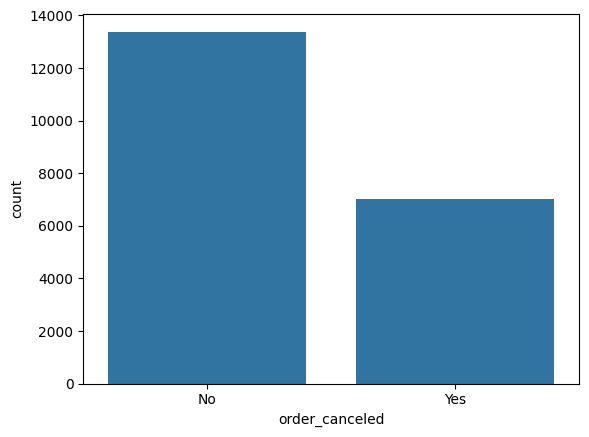

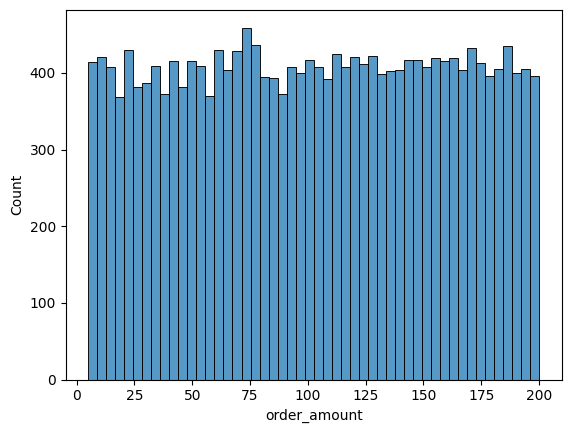

In [7]:
sns.countplot(data=df, x='order_canceled')
plt.show()

# order_amount distribution
sns.histplot(df['order_amount'].dropna(), bins=50)
plt.show()


**preprocessing and feature engineering**

In [8]:
NUMERIC = ['order_amount','number_of_items','distance_km','customer_rating','previous_cancellations','delivery_duration_min']
CATEGORICAL = ['restaurant','city','delivery_type','order_time','day_of_week','payment_method']


build pipeline

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([('num', num_pipe, NUMERIC),
                                  ('cat', cat_pipe, CATEGORICAL)])


**Train / Test split(use stratify)**

In [10]:
X = df[NUMERIC + CATEGORICAL]
y = df['order_canceled'].map({'No':0,'Yes':1})  # convert to 0/1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [11]:
pipe = Pipeline([('pre', preprocessor),
                 ('model', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1))])

pipe.fit(X_train, y_train)

# Evaluate
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.73      0.91      0.81      2678
           1       0.67      0.36      0.47      1402

    accuracy                           0.72      4080
   macro avg       0.70      0.63      0.64      4080
weighted avg       0.71      0.72      0.69      4080

ROC AUC: 0.7553837257987362


**Use cross-validation and hyperparameter tuning**

In [12]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'model__n_estimators':[100,200,400],
    'model__max_depth':[None,10,20],
    'model__min_samples_split':[2,5,10]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(pipe, param_dist, n_iter=10, scoring='f1', cv=cv, n_jobs=-1, random_state=42)
search.fit(X_train, y_train)
best = search.best_estimator_


save model and metadata(downloadable)

In [13]:
import joblib, json

joblib.dump(best, 'order_cancel_pipeline.pkl')

# Save sample meta for categorical options to populate UI
meta = {col: list(df[col].dropna().unique()) for col in CATEGORICAL}
with open('feature_meta.json', 'w') as f:
    json.dump(meta, f)

# In Colab you can download:
from google.colab import files
files.download('order_cancel_pipeline.pkl')
files.download('feature_meta.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>